### Preliminary Code

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound


In [43]:
grid_size = 100
grid = np.linspace(0, 1, grid_size)

In [44]:
def bellman_operator(v, delta, compute_policy=0):

    # === Apply linear interpolation to v === #
    v_func = lambda x: np.interp(x, grid, v)
    
    Tv = np.empty_like(v)

    if compute_policy:
        σ = np.empty_like(v)

    for i, t in enumerate(grid):
        
        def objective(r):
            return - r * t - delta * (1 - r) * v_func(r)

        #import pdb; pdb.set_trace()
        c_star = fminbound(objective, 0, t)
        
        if compute_policy:
            σ[i] = c_star
            
        Tv[i] = -objective(c_star)
            

    if compute_policy:
        return Tv, σ
    else:
        return Tv

In [45]:
def solve(delta=0.9, tol=1e-5, max_iter=500):

    v = np.ones_like(grid)  # Set initial condition
    error = tol + 1
    i = 0

    # Iterate to find solution
    while error > tol and i < max_iter:
        
        v_new = bellman_operator(v, delta)
        error = np.max(np.abs(v_new - v))
        print(f'i = {i}, error = {error}')
        v = v_new
        i += 1

    return v

### Examples

First let's solve the model with low $\delta$.

In [46]:
v = solve(delta=0.25)

i = 0, error = 0.7500013000232614
i = 1, error = 0.1875
i = 2, error = 0.046875
i = 3, error = 0.01171875
i = 4, error = 0.0029296875
i = 5, error = 0.000732421875
i = 6, error = 0.00018310546875
i = 7, error = 4.57763671875e-05
i = 8, error = 1.1444091796875e-05
i = 9, error = 2.86102294921875e-06


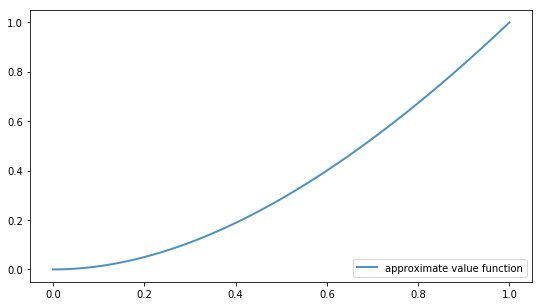

In [47]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(grid, v, lw=2, alpha=0.8, label='approximate value function')

ax.legend(loc='lower right')

plt.show()

Now let's solve the model with high $\delta$.

In [48]:
v = solve(delta=0.85)

i = 0, error = 0.15000511734478406
i = 1, error = 0.12750000000000006
i = 2, error = 0.108375
i = 3, error = 0.09211875000000003
i = 4, error = 0.0783009375
i = 5, error = 0.06655579687500002
i = 6, error = 0.05657242734375001
i = 7, error = 0.04808656324218746
i = 8, error = 0.04087357875585937
i = 9, error = 0.03474254194248047
i = 10, error = 0.02953116065110839
i = 11, error = 0.02510148655344213
i = 12, error = 0.021336263570425812
i = 13, error = 0.01813582403486194
i = 14, error = 0.015415450429632646
i = 15, error = 0.013103132865187744
i = 16, error = 0.01113766293540959
i = 17, error = 0.009467013495098146
i = 18, error = 0.008046961470833426
i = 19, error = 0.0068399172502084105
i = 20, error = 0.005813929662677152
i = 21, error = 0.004941840213275577
i = 22, error = 0.0042005641812842415
i = 23, error = 0.003570479554091604
i = 24, error = 0.0030349076209778628
i = 25, error = 0.002579671477831183
i = 26, error = 0.002192720756156506
i = 27, error = 0.0018638126427330311
i 

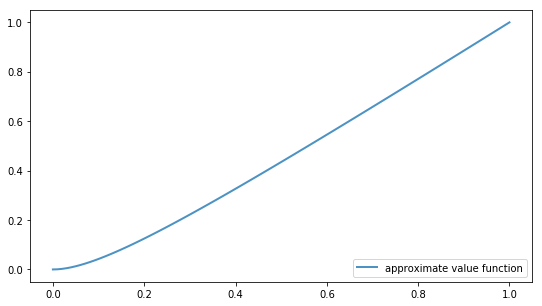

In [49]:
fig, ax = plt.subplots(figsize=(9, 5))

ax.plot(grid, v, lw=2, alpha=0.8, label='approximate value function')

ax.legend(loc='lower right')

plt.show()